In [44]:
# Read data 
import pandas as pd 
import io 
import PIL
import geopandas as gpd 
data = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')

In [2]:
data.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883


In [3]:
# group by country 
data = data.groupby('Country/Region').sum() 
data.head() 

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883


In [4]:
# drop lat and long 
data.drop(columns=['Lat', 'Long'], inplace=True)
data.head() 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
Albania,0,0,0,0,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
Algeria,0,0,0,0,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174
Andorra,0,0,0,0,0,0,0,0,0,0,...,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917
Angola,0,0,0,0,0,0,0,0,0,0,...,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883


In [5]:
# transpose 
transposed_data = data.T 
transposed_data.head() 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


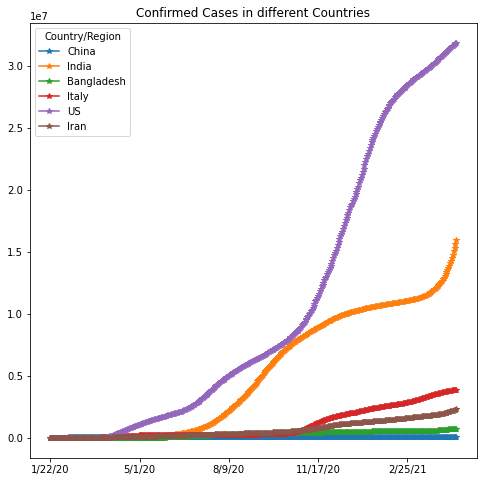

In [6]:
transposed_data.plot(y = ['China', 'India', 'Bangladesh', 'Italy', 'US', 'Iran'],
                     use_index=True, figsize=(8,8), 
                    marker = "*", title = "Confirmed Cases in different Countries")

In [7]:
# Read shape file 
world = gpd.read_file(r'../shapefiles/World_Map.shp')

In [8]:
# type 
type(world)

geopandas.geodataframe.GeoDataFrame

In [9]:
world.head() 

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


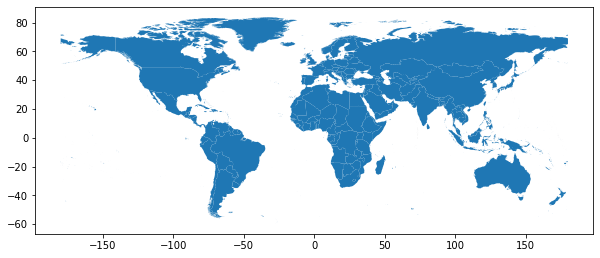

In [10]:
world.plot(figsize=(10,10)) 

In [11]:
# Check for names 
for index, row in data.iterrows(): 
    if index not in world['NAME'].to_list(): 
        print(index)
    else: 
        pass 

Brunei
Cabo Verde
Congo (Brazzaville)
Congo (Kinshasa)
Czechia
Diamond Princess
Eswatini
Holy See
Iran
Korea, South
Kosovo
Laos
Libya
MS Zaandam
Micronesia
Moldova
North Macedonia
South Sudan
Syria
Taiwan*
Tanzania
US
Vietnam
West Bank and Gaza


In [12]:
merged_data = world.join(data, on='NAME', how = "right")

In [13]:
merged_data.head() 

,NAME,geometry,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0.0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0,0,0,0,0,0,0,0,...,1198,1201,1201,1209,1213,1216,1216,1217,1217,1217
1.0,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",0,0,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174
2.0,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",0,0,0,0,0,0,0,0,...,287144,289601,291894,294211,296374,298522,300666,301661,303858,305933
3.0,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",0,0,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
4.0,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",0,0,0,0,0,0,0,0,...,203327,204053,205128,206142,207103,207973,208520,208818,209485,210518


In [32]:
merged_data.columns

Index(['NAME', 'geometry', '1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '4/12/21', '4/13/21', '4/14/21', '4/15/21', '4/16/21', '4/17/21',
       '4/18/21', '4/19/21', '4/20/21', '4/21/21'],
      dtype='object', length=458)

In [33]:
type(merged_data.columns)

pandas.core.indexes.base.Index

In [34]:
merged_data.columns.to_list() 

['NAME',
 'geometry',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20

In [36]:
merged_data.columns.to_list()[2]

'1/22/20'

In [37]:
len(merged_data.columns.to_list())

458

In [41]:
merged_data.columns.to_list()[2:10]

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20']

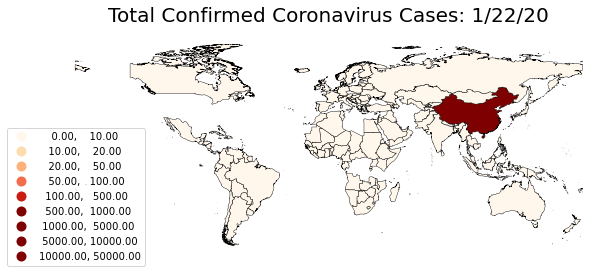

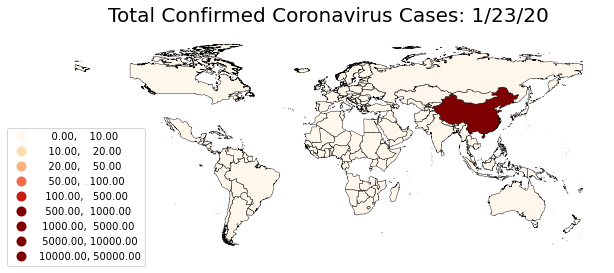

In [43]:
for dates in merged_data.columns.to_list()[2:4]: 
    ax = merged_data.plot(column = dates, 
                         cmap = 'OrRd', 
                         figsize=(10,10), 
                         legend=True, 
                         edgecolor='black', 
                         scheme = 'user_defined', 
                         classification_kwds = {'bins':  [10, 20, 50, 100, 500, 1000, 5000, 10000, 50000]},
                         linewidth=0.4)

    ax.set_title('Total Confirmed Coronavirus Cases: '+dates, fontsize = 20, pad=12.5)
    ax.set_axis_off() 
    ax.get_legend().set_bbox_to_anchor((0.18, 0.6))

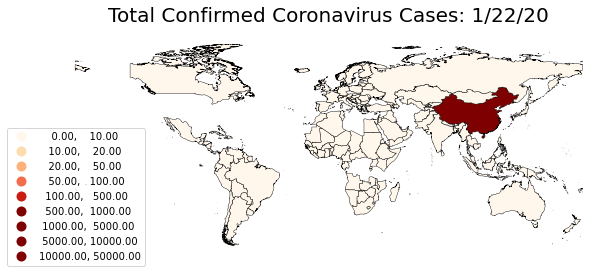

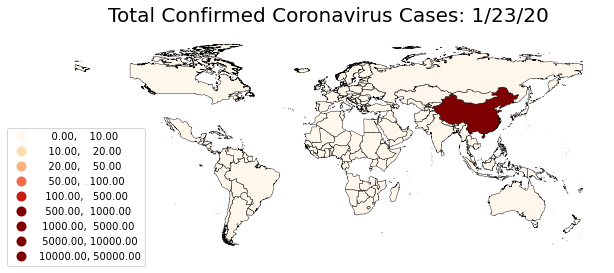

In [45]:
image_frames = []
for dates in merged_data.columns.to_list()[2:4]: 
    ax = merged_data.plot(column = dates, 
                         cmap = 'OrRd', 
                         figsize=(10,10), 
                         legend=True, 
                         edgecolor='black', 
                         scheme = 'user_defined', 
                         classification_kwds = {'bins':  [10, 20, 50, 100, 500, 1000, 5000, 10000, 50000]},
                         linewidth=0.4)

    ax.set_title('Total Confirmed Coronavirus Cases: '+dates, fontsize = 20, pad=12.5)
    ax.set_axis_off() 
    ax.get_legend().set_bbox_to_anchor((0.18, 0.6))
    img = ax.get_figure() 
    f = io.BytesIO() 
    img.savefig(f, format='png')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
f.close()

In [46]:
image_frames

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720 at 0x7FB9978797F0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720 at 0x7FB978A01CD0>]

In [ ]:
image_frames = []
for dates in merged_data.columns.to_list()[2:457]: 
    ax = merged_data.plot(column = dates, 
                         cmap = 'OrRd', 
                         figsize=(14,14), 
                         legend=True, 
                         edgecolor='black', 
                         scheme = 'user_defined', 
                         classification_kwds = {'bins':  [10, 20, 50, 100, 500, 1000, 5000, 10000, 50000]},
                         linewidth=0.4)

    ax.set_title('Total Confirmed Coronavirus Cases: '+dates, fontsize = 20, pad=12.5)
    ax.set_axis_off() 
    ax.get_legend().set_bbox_to_anchor((0.18, 0.6))
    img = ax.get_figure() 
    f = io.BytesIO() 
    img.savefig(f, format='png', bbox = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))

# create gif 
image_frames[0].save("Dynamic_COVID-19_MAP.gif", format='GIF', append_images = image_frames[1:], 
                    save_all = True, duration=300, 
                    loop = 3)
f.close()

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/home/jubayer/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained